In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load Data 18 subjects, 2 datasets per subject for each foot
left_foot = pd.read_csv("~/Documents/processed/processed/OG_dt_control/sub_01/left_foot_core_params.csv")
right_foot = pd.read_csv("~/Documents/processed/processed/OG_dt_control/sub_01/right_foot_core_params.csv")
left_foot_aggs = pd.read_csv("~/Documents/processed/processed/OG_dt_control/sub_01/left_foot_aggregate_params.csv")
right_foot_aggs = pd.read_csv("~/Documents/processed/processed/OG_dt_control/sub_01/right_foot_aggregate_params.csv")

In [ ]:
print(left_foot.shape)
left_foot.columns

(284, 17)


Index(['stride_index', 'timestamps', 'stride_lengths', 'clearances_min',
       'clearances_max', 'stride_times', 'swing_times', 'stance_times',
       'stance_ratios', 'fo_times', 'ic_times', 'fo_samples', 'ic_samples',
       'is_outlier', 'turning_step', 'turning_interval', 'interrupted'],
      dtype='object')

In [6]:
print(left_foot_aggs.shape)
left_foot_aggs.columns

(1, 18)


Index(['stride_lengths_avg', 'clearances_min_avg', 'clearances_max_avg',
       'stride_times_avg', 'swing_times_avg', 'stance_times_avg',
       'stance_ratios_avg', 'cadence_avg', 'speed_avg', 'stride_lengths_CV',
       'clearances_min_CV', 'clearances_max_CV', 'stride_times_CV',
       'swing_times_CV', 'stance_times_CV', 'stance_ratios_CV', 'cadence_CV',
       'speed_CV'],
      dtype='object')

In [7]:
print(right_foot.shape)
right_foot.columns

(287, 17)


Index(['stride_index', 'timestamps', 'stride_lengths', 'clearances_min',
       'clearances_max', 'stride_times', 'swing_times', 'stance_times',
       'stance_ratios', 'fo_times', 'ic_times', 'fo_samples', 'ic_samples',
       'is_outlier', 'turning_step', 'turning_interval', 'interrupted'],
      dtype='object')

In [8]:
print(right_foot_aggs.shape)
right_foot_aggs.columns

(1, 18)


Index(['stride_lengths_avg', 'clearances_min_avg', 'clearances_max_avg',
       'stride_times_avg', 'swing_times_avg', 'stance_times_avg',
       'stance_ratios_avg', 'cadence_avg', 'speed_avg', 'stride_lengths_CV',
       'clearances_min_CV', 'clearances_max_CV', 'stride_times_CV',
       'swing_times_CV', 'stance_times_CV', 'stance_ratios_CV', 'cadence_CV',
       'speed_CV'],
      dtype='object')

## Combine Left and Right Foot Data

In [11]:
left_foot['stride_index'] = ("Left " + left_foot['stride_index'].astype(str)).astype(str)
right_foot['stride_index'] = ("Right " + right_foot['stride_index'].astype(str)).astype(str)
print(left_foot['stride_index'])
print(right_foot['stride_index'])

0        Left 0
1        Left 1
2        Left 2
3        Left 3
4        Left 4
         ...   
279    Left 279
280    Left 280
281    Left 281
282    Left 282
283    Left 283
Name: stride_index, Length: 284, dtype: object
0        Right 0
1        Right 1
2        Right 2
3        Right 3
4        Right 4
         ...    
282    Right 282
283    Right 283
284    Right 284
285    Right 285
286    Right 286
Name: stride_index, Length: 287, dtype: object


In [12]:
left_right = pd.concat([left_foot,right_foot], ignore_index=True, axis=0)
left_right.sort_values(by='timestamps', axis=0)
#print(left_right.head())

,stride_index,timestamps,stride_lengths,clearances_min,clearances_max,stride_times,swing_times,stance_times,stance_ratios,fo_times,ic_times,fo_samples,ic_samples,is_outlier,turning_step,turning_interval,interrupted
284,Right 0,3.53125,1.378170,0.013521,0.070301,1.24219,0.50000,0.74219,0.597485,4.27344,4.77344,547,611,False,False,True,False
0,Left 0,4.15625,1.444584,0.003656,0.062413,1.21875,0.50781,0.71094,0.583335,4.86719,5.37500,623,688,False,False,True,False
285,Right 1,4.77344,1.366619,0.023390,0.083377,1.17968,0.46874,0.71094,0.602655,5.48438,5.95312,702,762,True,False,True,False
1,Left 1,5.37500,1.435109,0.014219,0.083606,1.16406,0.49218,0.67188,0.577187,6.04688,6.53906,774,837,True,False,True,False
286,Right 2,5.95312,1.513587,0.011573,0.073130,1.17969,0.49219,0.68750,0.582780,6.64062,7.13281,850,913,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Right 284,375.28906,1.306171,0.009512,0.062074,1.27344,0.50000,0.77344,0.607363,376.06250,376.56250,48136,48200,False,False,False,False
282,Left 282,375.93750,1.330585,0.010484,0.074194,1.26562,0.52343,0.74219,0.586424,376.67969,377.20312,48215,48282,False,False,True,False
569,Right 285,376.56250,1.329454,0.009890,0.066398,1.25000,0.51562,0.73438,0.587504,377.29688,377.81250,48294,48360,False,False,True,False
283,Left 283,377.20312,1.313459,0.004803,0.063395,1.25000,0.51562,0.73438,0.587504,377.93750,378.45312,48376,48442,False,False,True,False


In [43]:
left_foot_aggs['ID'] = 'Left'
right_foot_aggs['ID'] = 'Right'
left_right_aggs = pd.concat([left_foot_aggs,right_foot_aggs], ignore_index=True, axis=0)

In [44]:
left_right_aggs

,stride_lengths_avg,clearances_min_avg,clearances_max_avg,stride_times_avg,swing_times_avg,stance_times_avg,stance_ratios_avg,cadence_avg,speed_avg,stride_lengths_CV,clearances_min_CV,clearances_max_CV,stride_times_CV,swing_times_CV,stance_times_CV,stance_ratios_CV,cadence_CV,speed_CV,ID
0,1.276921,0.005449,0.065655,1.242222,0.508467,0.733755,0.590527,96.684357,1.029874,0.050167,0.641952,0.066205,0.029223,0.024968,0.040105,0.015714,0.029491,0.074565,Left
1,1.287419,0.010426,0.066376,1.242322,0.504782,0.737540,0.593616,96.693962,1.038146,0.050195,0.264344,0.048154,0.032256,0.039237,0.040119,0.019166,0.032306,0.071486,Right


## Left Foot Univariate Analysis

In [9]:
print(left_foot_aggs.head())

   stride_lengths_avg  clearances_min_avg  clearances_max_avg  \
0            1.276921            0.005449            0.065655   

   stride_times_avg  swing_times_avg  stance_times_avg  stance_ratios_avg  \
0          1.242222         0.508467          0.733755           0.590527   

   cadence_avg  speed_avg  stride_lengths_CV  clearances_min_CV  \
0    96.684357   1.029874           0.050167           0.641952   

   clearances_max_CV  stride_times_CV  swing_times_CV  stance_times_CV  \
0           0.066205         0.029223        0.024968         0.040105   

   stance_ratios_CV  cadence_CV  speed_CV  
0          0.015714    0.029491  0.074565  


In [39]:
# Left Foot Descriptive Metrics
left_foot.describe()

,timestamps,stride_lengths,clearances_min,clearances_max,stride_times,swing_times,stance_times,stance_ratios,fo_times,ic_times,fo_samples,ic_samples
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,188.963744,1.282523,0.005331,0.065572,1.317947,0.511361,0.806585,0.598482,189.770329,190.281690,24290.602113,24356.056338
std,108.589260,0.079986,0.003715,0.004762,0.403264,0.016117,0.397934,0.045829,108.604832,108.609745,13901.418478,13902.047332
min,4.156250,1.105793,-0.004911,0.052674,1.125000,0.476560,0.640620,0.554215,4.867190,5.375000,623.000000,688.000000
25%,93.791015,1.235181,0.002983,0.062445,1.218750,0.500000,0.710940,0.584417,94.507812,95.021480,12097.000000,12162.750000
50%,189.117190,1.273238,0.005510,0.065246,1.250000,0.507820,0.734380,0.591198,189.859380,190.367190,24302.000000,24367.000000
75%,281.337890,1.319067,0.007734,0.068561,1.273440,0.515630,0.757810,0.597424,282.531247,283.087890,36164.000000,36235.250000
max,377.203120,1.967468,0.015694,0.083606,4.179690,0.585940,3.640630,0.875707,377.937500,378.453120,48376.000000,48442.000000


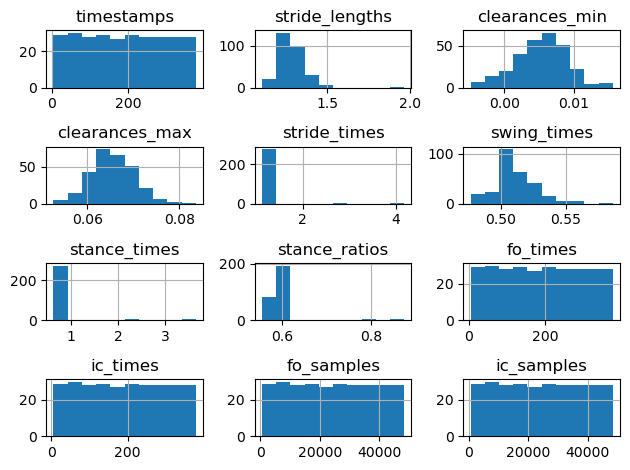

In [13]:
left_foot.hist()
plt.tight_layout()
plt.show()

In [34]:
cm = left_foot.corr()
print(cm)

                  timestamps  stride_lengths  clearances_min  clearances_max  \
timestamps          1.000000       -0.464532        0.064988       -0.185949   
stride_lengths     -0.464532        1.000000        0.070141        0.276895   
clearances_min      0.064988        0.070141        1.000000        0.758537   
clearances_max     -0.185949        0.276895        0.758537        1.000000   
stride_times        0.048944        0.289207       -0.065479       -0.142927   
swing_times         0.303649       -0.108154       -0.035271       -0.112214   
stance_times        0.037301        0.297462       -0.064927       -0.140297   
stance_ratios       0.086506        0.211913       -0.103571       -0.212622   
fo_times            0.999993       -0.463375        0.064740       -0.186437   
ic_times            0.999993       -0.463371        0.064732       -0.186445   
fo_samples          0.999993       -0.463375        0.064740       -0.186437   
ic_samples          0.999993       -0.46

C:\Users\633224\AppData\Local\Temp\ipykernel_42804\2238153384.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = left_foot.corr()


##### Note: Strong correlation (>.75) can be seen between 'turning_step' and 'stride_times', 'stance_times', 'stance_ratios', and 'is_outlier'.

<Axes: xlabel='stance_times', ylabel='Count'>

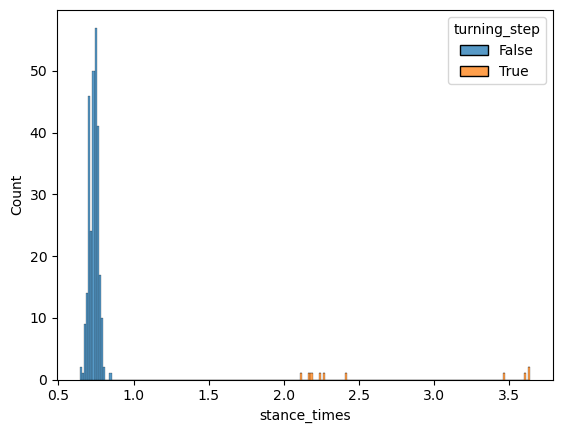

In [37]:
sns.histplot(data=left_foot, 
             x="stance_times", hue="turning_step", multiple="stack")

<Axes: xlabel='stride_lengths', ylabel='Count'>

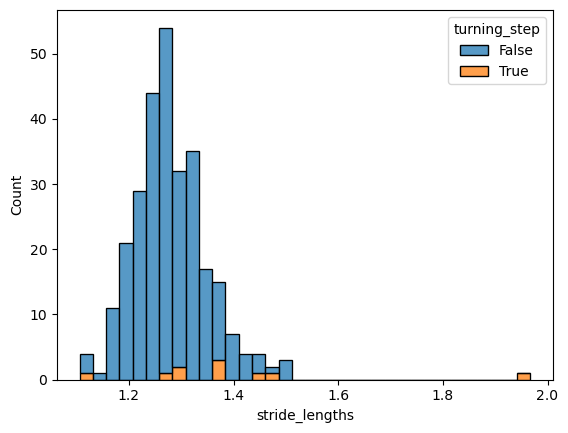

In [29]:
sns.histplot(data=left_foot, 
             x="stride_lengths", hue="turning_step", multiple="stack")

<Axes: xlabel='turning_step', ylabel='stride_lengths'>

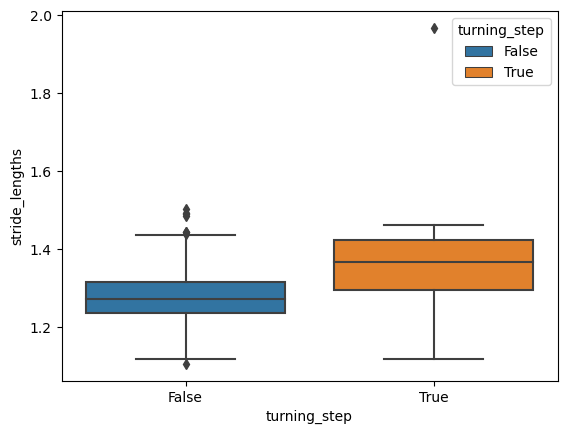

In [32]:
sns.boxplot(data=left_foot, x="turning_step", y="stride_lengths", hue="turning_step", dodge=False)

## Right Foot Univariate Analysis

In [10]:
print(right_foot_aggs.head())

   stride_lengths_avg  clearances_min_avg  clearances_max_avg  \
0            1.287419            0.010426            0.066376   

   stride_times_avg  swing_times_avg  stance_times_avg  stance_ratios_avg  \
0          1.242322         0.504782           0.73754           0.593616   

   cadence_avg  speed_avg  stride_lengths_CV  clearances_min_CV  \
0    96.693962   1.038146           0.050195           0.264344   

   clearances_max_CV  stride_times_CV  swing_times_CV  stance_times_CV  \
0           0.048154         0.032256        0.039237         0.040119   

   stance_ratios_CV  cadence_CV  speed_CV  
0          0.019166    0.032306  0.071486  


In [40]:
# Right Foot Descriptive Metrics
right_foot.describe()

,timestamps,stride_lengths,clearances_min,clearances_max,stride_times,swing_times,stance_times,stance_ratios,fo_times,ic_times,fo_samples,ic_samples
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,187.506206,1.275800,0.010550,0.066417,1.308553,0.509337,0.799216,0.598507,188.305422,188.814759,24103.094077,24168.289199
std,109.201559,0.124697,0.003410,0.003551,0.407629,0.038466,0.406147,0.043885,109.233880,109.239408,13981.936676,13982.644144
min,3.531250,0.320770,0.003855,0.053474,1.132810,0.453120,0.656250,0.467975,4.273440,4.773440,547.000000,611.000000
25%,92.855470,1.241062,0.008483,0.064035,1.218750,0.492190,0.718750,0.586418,93.593750,94.101565,11980.000000,12045.000000
50%,185.351560,1.278713,0.010160,0.066200,1.250000,0.500000,0.742190,0.596152,186.078120,186.593750,23818.000000,23884.000000
75%,281.023435,1.328732,0.012533,0.068319,1.281245,0.515630,0.757815,0.602413,283.269530,283.789060,36258.500000,36325.000000
max,377.812500,1.548836,0.035774,0.083377,4.250000,0.843760,3.742190,0.880515,378.562500,379.085940,48456.000000,48523.000000


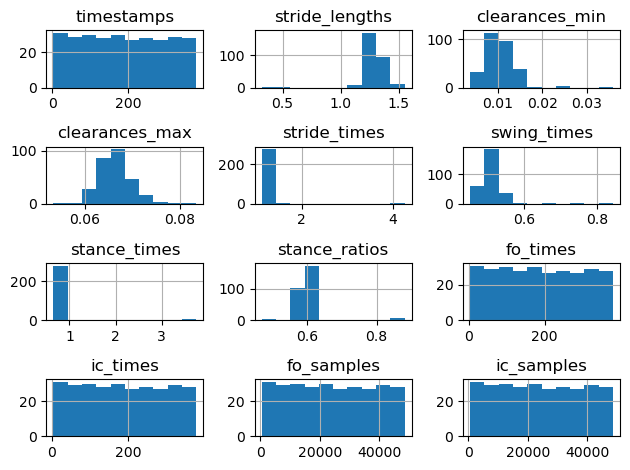

In [14]:
right_foot.hist()
plt.tight_layout()
plt.show()

In [17]:
cm = right_foot.corr()
print(cm)

                  timestamps  stride_lengths  clearances_min  clearances_max  \
timestamps          1.000000       -0.250283       -0.013362       -0.249054   
stride_lengths     -0.250283        1.000000       -0.405348        0.170896   
clearances_min     -0.013362       -0.405348        1.000000        0.571776   
clearances_max     -0.249054        0.170896        0.571776        1.000000   
stride_times        0.091001       -0.094479       -0.060861       -0.119231   
swing_times         0.143594       -0.755762        0.306123       -0.139753   
stance_times        0.077733       -0.023247       -0.090076       -0.106430   
stance_ratios       0.082086        0.193717       -0.172521       -0.088264   
fo_times            0.999993       -0.250296       -0.013693       -0.249376   
ic_times            0.999993       -0.250549       -0.013584       -0.249412   
fo_samples          0.999993       -0.250296       -0.013693       -0.249376   
ic_samples          0.999993       -0.25

C:\Users\633224\AppData\Local\Temp\ipykernel_42804\3472792498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = right_foot.corr()


## Both Feet Univariate Analysis

In [45]:
left_right_aggs

,stride_lengths_avg,clearances_min_avg,clearances_max_avg,stride_times_avg,swing_times_avg,stance_times_avg,stance_ratios_avg,cadence_avg,speed_avg,stride_lengths_CV,clearances_min_CV,clearances_max_CV,stride_times_CV,swing_times_CV,stance_times_CV,stance_ratios_CV,cadence_CV,speed_CV,ID
0,1.276921,0.005449,0.065655,1.242222,0.508467,0.733755,0.590527,96.684357,1.029874,0.050167,0.641952,0.066205,0.029223,0.024968,0.040105,0.015714,0.029491,0.074565,Left
1,1.287419,0.010426,0.066376,1.242322,0.504782,0.737540,0.593616,96.693962,1.038146,0.050195,0.264344,0.048154,0.032256,0.039237,0.040119,0.019166,0.032306,0.071486,Right


In [47]:
left_right_aggs.mean()

C:\Users\633224\AppData\Local\Temp\ipykernel_42804\1243612652.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  left_right_aggs.mean()


stride_lengths_avg     1.282170
clearances_min_avg     0.007938
clearances_max_avg     0.066016
stride_times_avg       1.242272
swing_times_avg        0.506624
stance_times_avg       0.735648
stance_ratios_avg      0.592072
cadence_avg           96.689159
speed_avg              1.034010
stride_lengths_CV      0.050181
clearances_min_CV      0.453148
clearances_max_CV      0.057179
stride_times_CV        0.030739
swing_times_CV         0.032102
stance_times_CV        0.040112
stance_ratios_CV       0.017440
cadence_CV             0.030898
speed_CV               0.073026
dtype: float64

In [41]:
# Joint steps Descriptive Metrics
left_right.describe()

,timestamps,stride_lengths,clearances_min,clearances_max,stride_times,swing_times,stance_times,stance_ratios,fo_times,ic_times,fo_samples,ic_samples
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,188.231146,1.279144,0.007954,0.065997,1.313225,0.510344,0.802881,0.598495,189.034027,189.544371,24196.355517,24261.679510
std,108.804333,0.104832,0.004417,0.004215,0.405135,0.029536,0.401747,0.044823,108.828351,108.833575,13930.028864,13930.697615
min,3.531250,0.320770,-0.004911,0.052674,1.125000,0.453120,0.640620,0.467975,4.273440,4.773440,547.000000,611.000000
25%,93.164065,1.236306,0.005343,0.063338,1.218750,0.500000,0.718750,0.585366,93.902345,94.417970,12019.500000,12085.500000
50%,187.226560,1.275674,0.008138,0.065852,1.250000,0.507810,0.742190,0.592595,187.976560,188.500000,24061.000000,24128.000000
75%,281.332030,1.323673,0.010826,0.068521,1.273440,0.515630,0.757810,0.600000,283.273435,283.824220,36259.000000,36329.500000
max,377.812500,1.967468,0.035774,0.083606,4.250000,0.843760,3.742190,0.880515,378.562500,379.085940,48456.000000,48523.000000


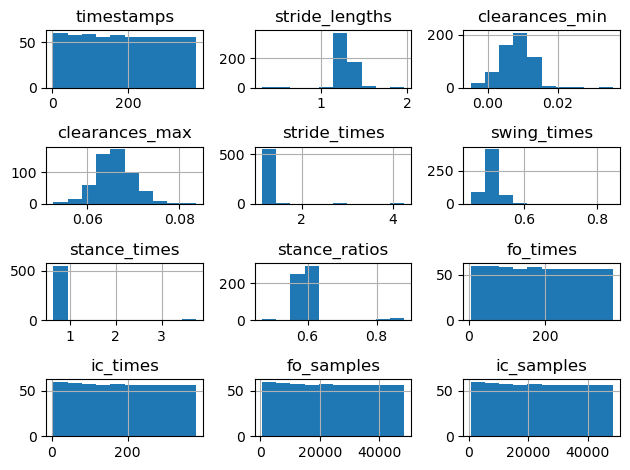

In [15]:
left_right.hist()
plt.tight_layout()
plt.show()

In [18]:
cm = left_right.corr()
print(cm)

                  timestamps  stride_lengths  clearances_min  clearances_max  \
timestamps          1.000000       -0.325334        0.017926       -0.210444   
stride_lengths     -0.325334        1.000000       -0.183412        0.201229   
clearances_min      0.017926       -0.183412        1.000000        0.603786   
clearances_max     -0.210444        0.201229        0.603786        1.000000   
stride_times        0.070327        0.052689       -0.057801       -0.131682   
swing_times         0.176505       -0.608686        0.126121       -0.114726   
stance_times        0.057944        0.097883       -0.067561       -0.124358   
stance_ratios       0.084297        0.195267       -0.109488       -0.158451   
fo_times            0.999993       -0.324901        0.017673       -0.210856   
ic_times            0.999993       -0.325051        0.017706       -0.210877   
fo_samples          0.999993       -0.324901        0.017673       -0.210856   
ic_samples          0.999993       -0.32

C:\Users\633224\AppData\Local\Temp\ipykernel_42804\778678358.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = left_right.corr()


#### Note: Strong correlations with 'turning_step' and : 'is_outlier' .84, 'stride_times' .88, 'stance_ratios' .75.